# Face Recognition Using PCA <br>
### Lakshya Garg
### 211000027

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("face_data.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


4096 features thus each image is 64*64 image

In [3]:
labels=df['target']
features=df.drop(['target'],axis=1)
features

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [4]:
features.loc[1]

0       0.454545
1       0.471074
2       0.512397
3       0.557851
4       0.595041
          ...   
4091    0.152893
4092    0.152893
4093    0.152893
4094    0.152893
4095    0.152893
Name: 1, Length: 4096, dtype: float64

In [5]:
def img_visualizer(a):
    img=np.array(a)
    img.resize((64,64))
    ax=plt.subplot(1,1,1)
    ax.imshow(img,cmap='gray')
    plt.show()


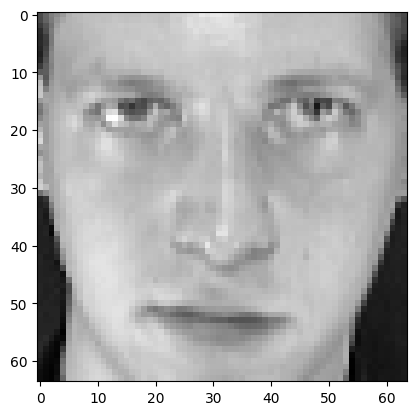

In [6]:
img_visualizer(features.loc[2])

In [7]:
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.3,stratify=labels)

In [8]:
type(features_test)
features_test.reset_index(drop=True,inplace=True)
features_test

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.429752,0.458678,0.549587,0.623967,0.673554,0.714876,0.723140,0.710744,0.714876,0.719008,...,0.355372,0.367769,0.384298,0.384298,0.396694,0.400826,0.388430,0.384298,0.384298,0.371901
1,0.516529,0.599174,0.644628,0.661157,0.685950,0.681818,0.727273,0.743802,0.756198,0.747934,...,0.293388,0.289256,0.252066,0.103306,0.045455,0.078512,0.082645,0.103306,0.078512,0.053719
2,0.454545,0.528926,0.644628,0.747934,0.780992,0.780992,0.801653,0.822314,0.826446,0.830578,...,0.061983,0.074380,0.070248,0.086777,0.066116,0.078512,0.090909,0.111570,0.148760,0.169422
3,0.280992,0.289256,0.400826,0.487603,0.533058,0.553719,0.607438,0.640496,0.665289,0.694215,...,0.516529,0.504132,0.508265,0.500000,0.495868,0.483471,0.475207,0.466942,0.462810,0.454545
4,0.417355,0.471074,0.595041,0.710744,0.764463,0.768595,0.776860,0.801653,0.818182,0.822314,...,0.066116,0.074380,0.074380,0.078512,0.074380,0.086777,0.111570,0.148760,0.152893,0.206612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.421488,0.462810,0.487603,0.500000,0.524793,0.516529,0.524793,0.566116,0.553719,0.524793,...,0.623967,0.685950,0.685950,0.677686,0.681818,0.706612,0.491736,0.301653,0.442149,0.495868
116,0.252066,0.231405,0.276859,0.417355,0.433884,0.669422,0.834711,0.859504,0.871901,0.871901,...,0.516529,0.508265,0.268595,0.140496,0.165289,0.169422,0.173554,0.181818,0.173554,0.177686
117,0.280992,0.194215,0.301653,0.487603,0.533058,0.541322,0.541322,0.582645,0.615702,0.603306,...,0.202479,0.190083,0.194215,0.202479,0.140496,0.181818,0.247934,0.235537,0.305785,0.363636
118,0.260331,0.194215,0.144628,0.314050,0.483471,0.508265,0.524793,0.574380,0.595041,0.615702,...,0.537190,0.533058,0.549587,0.545455,0.549587,0.595041,0.677686,0.698347,0.702479,0.698347


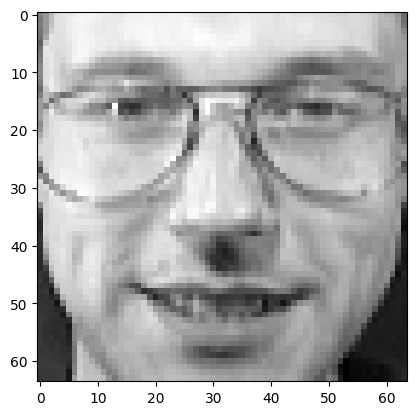

In [9]:
img_visualizer(features_test.loc[2])

In [10]:
labels_test

43      4
111    11
267    26
122    12
260    26
       ..
339    33
185    18
360    36
157    15
24      2
Name: target, Length: 120, dtype: int64

### PCA Start<br>Step 1 Normalize feature matrix

In [11]:
I=features_train.mean(axis=0)
I

0       0.399513
1       0.434283
2       0.478689
3       0.520455
4       0.559179
          ...   
4091    0.340481
4092    0.336511
4093    0.324469
4094    0.316839
4095    0.313238
Length: 4096, dtype: float64

In [12]:
D=features_train-I
D

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
261,-0.011083,0.028527,0.075030,0.182025,0.201151,0.176594,0.144008,0.126432,0.126181,0.118772,...,-0.285286,-0.284740,-0.273509,-0.275295,-0.246783,-0.199985,-0.191883,-0.167444,-0.163946,-0.131420
191,0.021975,0.078114,0.141145,0.136570,0.031730,-0.054811,-0.120455,-0.133899,-0.146547,-0.178749,...,-0.099336,-0.156641,-0.133014,-0.134799,-0.122816,-0.121473,-0.113371,-0.105460,-0.097831,-0.094230
382,-0.097860,-0.186349,-0.301004,-0.396488,-0.422816,-0.393654,-0.327066,-0.266130,-0.225059,-0.228335,...,-0.037352,-0.003749,-0.009047,-0.010832,0.005283,-0.005770,-0.001800,-0.010419,-0.011054,-0.015717
389,-0.250753,-0.227671,-0.284475,-0.326240,-0.298849,-0.249026,-0.223760,-0.233073,-0.196133,-0.133294,...,-0.095204,-0.090525,-0.066898,-0.048022,-0.007113,0.002494,0.014728,0.026771,0.042665,0.054531
303,0.212057,0.292990,0.265112,0.244008,0.205283,0.180726,0.148140,0.147093,0.134445,0.110508,...,0.144466,0.169805,0.139714,-0.155460,-0.308766,-0.138002,0.064315,0.047432,0.162500,0.356184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-0.296207,-0.306184,-0.247285,-0.156818,-0.046783,0.011305,0.024174,0.035522,0.055933,0.069185,...,-0.000162,0.008648,-0.017311,-0.138932,-0.267444,-0.220646,0.014728,-0.080667,-0.064773,0.042134
23,-0.201166,-0.256597,-0.296871,-0.338636,-0.369097,-0.311009,-0.112190,0.010729,0.068329,0.085714,...,-0.012559,0.004516,0.011615,0.013961,0.046606,0.056213,0.056051,0.084622,0.079855,0.099985
244,-0.172240,-0.215274,-0.263813,-0.346901,-0.249262,-0.005224,0.077893,0.089241,0.097255,0.106375,...,0.008102,-0.003749,-0.000782,-0.010832,0.013548,0.006626,0.010596,0.030903,0.030269,0.038002
237,0.162470,0.127701,0.075030,0.037397,0.006936,-0.021753,-0.054339,-0.096709,-0.113489,-0.145691,...,0.231243,0.248318,0.255416,0.241234,0.257349,0.271089,0.295720,0.307763,0.340186,0.343787


In [13]:
C=np.dot(D.T,D)
C.shape

(4096, 4096)

In [14]:
# Function to get top k eigenvectors
def get_top_k_eig_vectors(C,k):
   w,v= np.linalg.eigh(C)
   id=np.argsort(w)[::-1][:k]
   return v[:,id]

In [15]:
Eig=get_top_k_eig_vectors(C, 30)


In [16]:
Eig.shape

(4096, 30)

In [17]:
# Transformed=np.dot(features_train,Eig)
# New_Data.shape

In [18]:
transformed_data=np.dot(features_test,Eig)
transformed_data.shape

(120, 30)

In [19]:
reconstructed_data=np.dot(transformed_data,Eig.T)
reconstructed_data.shape


(120, 4096)

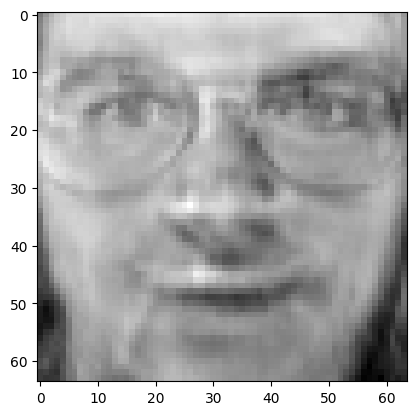

In [20]:
img_visualizer(reconstructed_data[2])

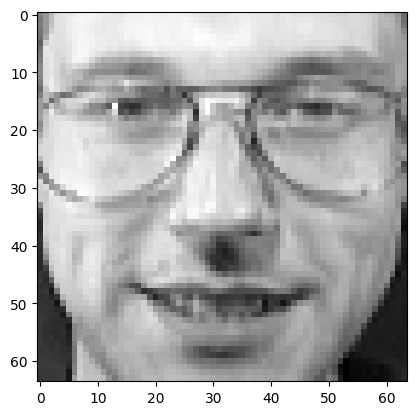

In [21]:
img_visualizer(features_test.loc[2])

We compare Uncompressed and compressed images when we take first 30 eigenvectors from the total 4096 eigenvectors




We can also increase k (number of top eigen vectors chosen to increase information encoded in the image)